In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import  Adam
import matplotlib.pyplot as plt

In [4]:
# Generate random house features
num_samples = 1000
np.random.seed(42)
sqft = np.random.randint(800, 5000,1000)
bedrooms=np.random.randint(1, 6,1000)
bathrooms=np.random.randint(1, 4,1000)
lot_size = np.random.uniform(0.1, 2.0, num_samples)  # Lot Size in Acres 
house_age=np.random.randint(1, 100,num_samples)
distance_city = np.random.uniform(1, 50, num_samples)  # Distance from City Center
# Generate house prices (target variable)
price = (sqft * 150) + (bedrooms * 5000) + (bathrooms * 3000) + (lot_size * 20000) - (house_age * 1000) - (distance_city * 2000) + np.random.randint(-5000, 5000, num_samples)





In [5]:
# Create a DataFrame

data=pd.DataFrame({
    'sqft':sqft,
    'bedrooms':bedrooms,
    'bathrooms':bathrooms,
    'lot_size':lot_size,
    'house_age':house_age,
    'distance_city':distance_city,
    'price':price
})

data.head()

,sqft,bedrooms,bathrooms,lot_size,house_age,distance_city,price
0,1660,2,2,0.674433,4,17.266604,237578.456011
1,4572,5,2,0.592736,42,23.801510,642697.706572
2,3892,1,2,0.469785,84,1.670438,518255.829148
3,1266,1,3,0.209530,38,4.998337,162165.933563
4,4244,1,1,0.750651,25,13.670988,604547.047265


In [6]:
# Split features and target variable

X=data.drop(columns=['price'])

y=data['price']

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# Normalize the data

scalar=StandardScaler()

X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)



In [8]:
X_train_scaled.shape[1]

6

In [9]:
model=Sequential([
    Dense(units=32,activation='relu',input_shape=(X_train_scaled.shape[1],),name='L1'),
    Dense(units=32,activation='relu',name='L2'),
    Dense(units=1,activation='linear',name='L3')
    
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:



# Compile the model
from tensorflow.keras.losses import  MeanSquaredError
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16,validation_data=(X_test_scaled,y_test),verbose=1)



Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178160779264.0000 - mae: 378619.2188 - val_loss: 176058155008.0000 - val_mae: 379907.9062
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 188986163200.0000 - mae: 396646.2188 - val_loss: 176054190080.0000 - val_mae: 379902.9062
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 180721647616.0000 - mae: 381155.5000 - val_loss: 176044883968.0000 - val_mae: 379891.5938
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 180474183680.0000 - mae: 384428.6562 - val_loss: 176026910720.0000 - val_mae: 379870.3750
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 174168309760.0000 - mae: 376690.2812 - val_loss: 175995813888.0000 - val_mae: 379834.5938
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 195903553536.0000 - mae: 400961.8125 - val_loss: 175947923456.0000 - val_mae: 379780.7188
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 184688951296.0000 - mae: 388304.2188 - val

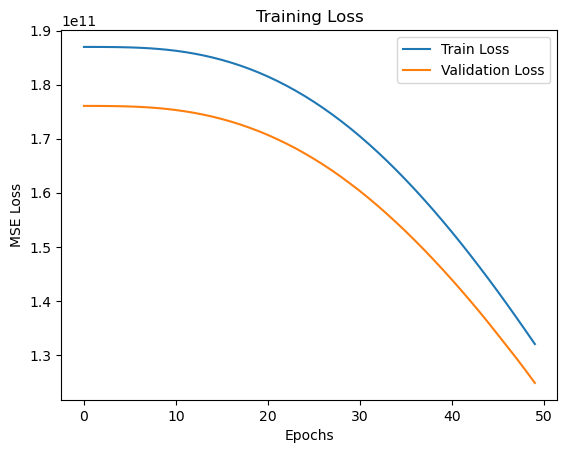

In [11]:
# Plot training loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

In [12]:
# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error on Test Set: {test_mae:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124899278848.0000 - mae: 322932.7812 
Mean Absolute Error on Test Set: 323139.53


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


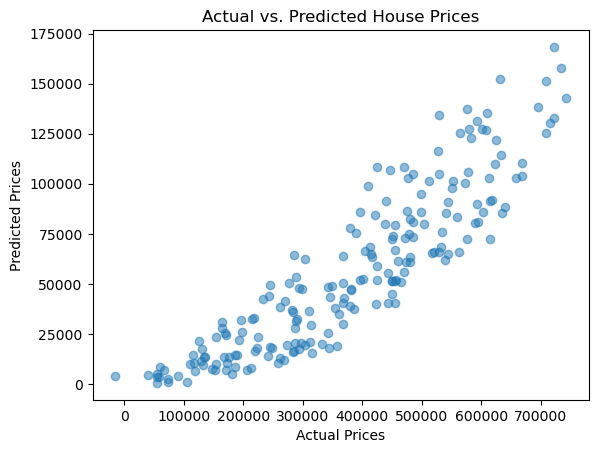

In [13]:
# Predict prices on test set
y_pred = model.predict(X_test_scaled)

# Compare actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()